In [1]:
from world import World 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import itertools as it

## Agents with Internal Models
Below are agents with internal models, which are static matrices that modulate how behavioral priors adn predictions are adjusted. In addition to the error, these matrices provide some randomness by biasing updates. Moreover, linear and sigmoid equations are used update predictions. 

Besides these equations memory (number of previous instances of predictions considered) and behavioral control (number of previous instances of behavioral prios considered) can be adjusted.

In [24]:
m_m_world = World(state_size = 35, time = 100, agent=["model_sig", "model_sig"], memory=[1, 1], behav_control=[1, 1])

m_m_world.create_agents()
m_m_world.run()
agents = m_m_world.get_agents()
errors = m_m_world.get_errors()
preds = m_m_world.get_pred()
priors = m_m_world.get_behav_priors()
costs = m_m_world.get_costs()

time = [t for t in range(len(costs[0]))]
#m_m_world.print_results()

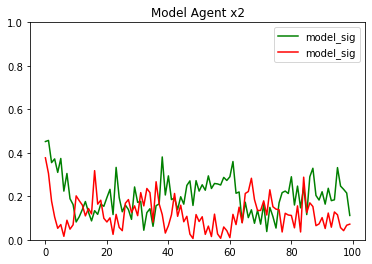

In [25]:
plt.figure(facecolor='white') 
plt.plot(time, costs[0], 'g', label=agents[0])
plt.plot(time, costs[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Model Agent x2")
plt.show()

## Adjusting the Internal Model Variance
Model variance determines the range of values that can exist in the internal model.

e.g. model_var = 3 means values range between -3 and 3

The greater this range, the more random the adjustments to each agents priors at each step


 Sigmoid Model Agents: state_size: 10, time: 100, behav_control: 5, memory: 5, varied model variance


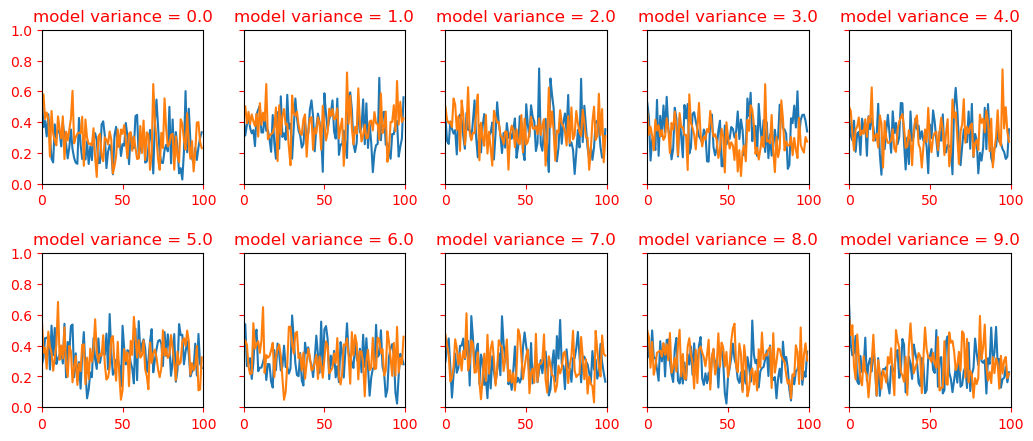

In [20]:
w = 2.5; h = 2.5
ncols = 5
nrows = 2
param_vals = [i for i in range(0, ncols*nrows)]
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
t = 100
time = [i for i in range(t)]

for ix, param in enumerate(param_vals):
    # experiments
    world = World(state_size = 10, time = t, agent=["model_sig", "model_sig"], memory=[1, 1], behav_control=[1, 1], model_var=[param, param], seed=7)
    world.create_agents()
    world.run()
    agents = world.get_agents()
    errors = world.get_errors()
    preds = world.get_pred()
    priors = world.get_behav_priors()
    costs = world.get_costs()

    ai = tups[ix]
    
    # plots
    ax[ai].plot(time, costs[0])
    ax[ai].plot(time, costs[1])
    ax[ai].set_title('model variance = %.1f'%param, color='red')
    ax[ai].set_xlim(0,t)
    ax[ai].set_ylim(0,1)
    ax[ai].tick_params(axis='x', colors='red')
    ax[ai].tick_params(axis='y', colors='red')

print("\n Sigmoid Model Agents: state_size: 10, time: 100, behav_control: 5, memory: 5, varied model variance")
plt.show()


 Linear Model Agents: state_size: 10, time: 100, behav_control: 5, memory: 5, varied model variance


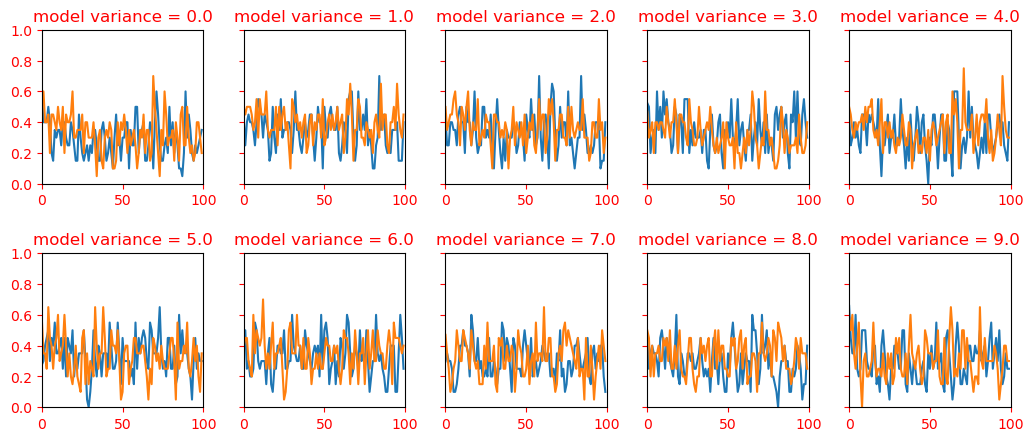

In [21]:
w = 2.5; h = 2.5
ncols = 5
nrows = 2
param_vals = [i for i in range(0, ncols*nrows)]
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
t = 100
time = [i for i in range(t)]

for ix, param in enumerate(param_vals):
    # experiments
    world = World(state_size = 10, time = t, agent=["model_lin", "model_lin"], memory=[1, 1], behav_control=[1, 1], model_var=[param, param], seed=7)
    world.create_agents()
    world.run()
    agents = world.get_agents()
    errors = world.get_errors()
    preds = world.get_pred()
    priors = world.get_behav_priors()
    costs = world.get_costs()

    ai = tups[ix]
    
    # plots
    ax[ai].plot(time, costs[0])
    ax[ai].plot(time, costs[1])
    ax[ai].set_title('model variance = %.1f'%param, color='red')
    ax[ai].set_xlim(0,t)
    ax[ai].set_ylim(0,1)
    ax[ai].tick_params(axis='x', colors='red')
    ax[ai].tick_params(axis='y', colors='red')

print("\n Linear Model Agents: state_size: 10, time: 100, behav_control: 5, memory: 5, varied model variance")
plt.show()

## Adjusting State Size
The larger the state size, the more features there are that constitute a behavior and corresponding prediction.


 Sigmoid Model Agents: time: 100, behav_control: 5, memory: 5, varied state size


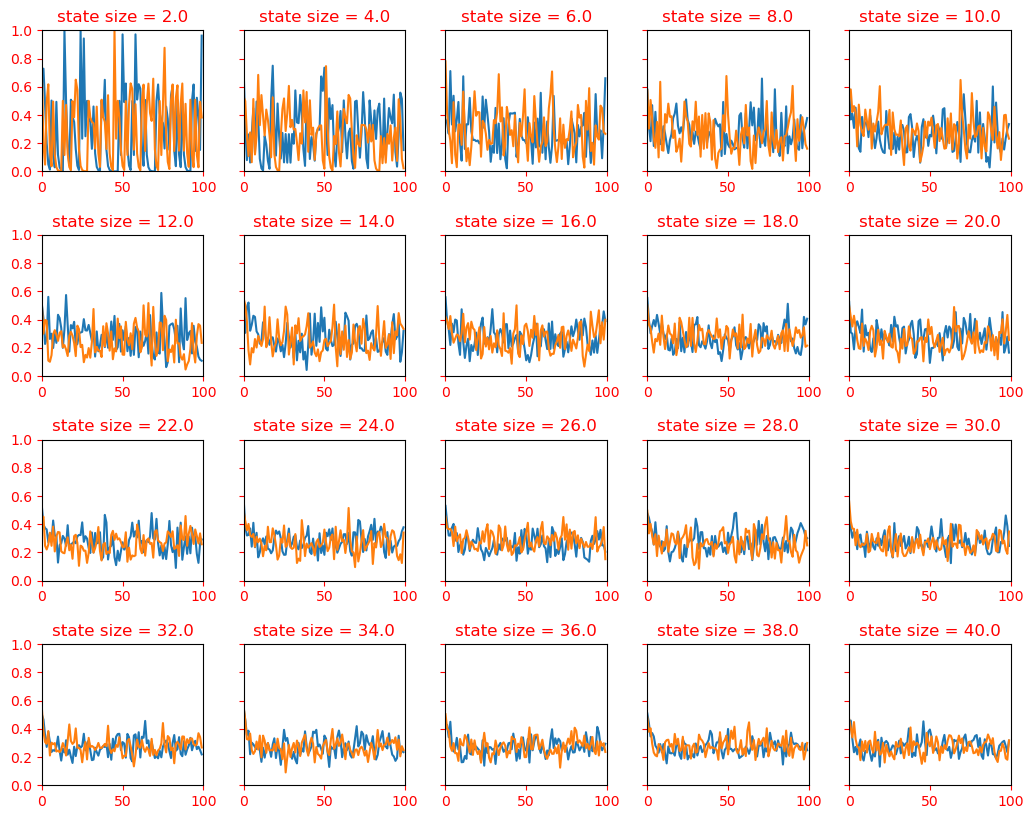

In [6]:
w = 2.5; h = 2.5
ncols = 5
nrows = 4
param_vals = [i*2 for i in range(1, ncols*nrows+1)]
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
t = 100
time = [i for i in range(t)]

for ix, param in enumerate(param_vals):
    # experiments
    world = World(state_size = param, time = t, agent=["model_sig", "model_sig"], memory=[1, 1], behav_control=[1, 1], seed=7)
    world.create_agents()
    world.run()
    agents = world.get_agents()
    errors = world.get_errors()
    preds = world.get_pred()
    priors = world.get_behav_priors()
    costs = world.get_costs()

    ai = tups[ix]
    
    # plots
    ax[ai].plot(time, costs[0])
    ax[ai].plot(time, costs[1])
    ax[ai].set_title('state size = %.1f'%param, color='red')
    ax[ai].set_xlim(0,t)
    ax[ai].set_ylim(0,1)
    ax[ai].tick_params(axis='x', colors='red')
    ax[ai].tick_params(axis='y', colors='red')

print("\n Sigmoid Model Agents: time: 100, behav_control: 5, memory: 5, varied state size")
plt.show()


 Linear Model Agents: time: 100, behav_control: 5, memory: 5, varied state size


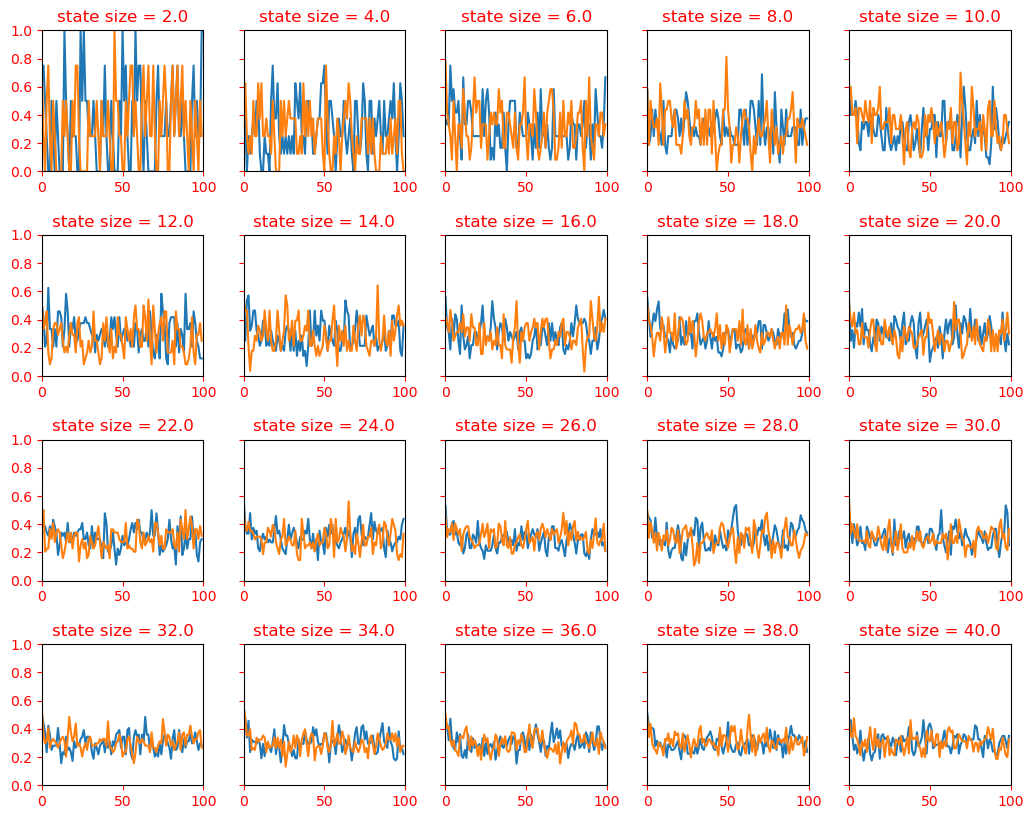

In [7]:
w = 2.5; h = 2.5
ncols = 5
nrows = 4
param_vals = [i*2 for i in range(1, ncols*nrows+1)]
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
t = 100
time = [i for i in range(t)]

for ix, param in enumerate(param_vals):
    # experiments
    world = World(state_size = param, time = t, agent=["model_lin", "model_lin"], memory=[1, 1], behav_control=[1, 1], seed=7)
    world.create_agents()
    world.run()
    agents = world.get_agents()
    errors = world.get_errors()
    preds = world.get_pred()
    priors = world.get_behav_priors()
    costs = world.get_costs()

    ai = tups[ix]
    
    # plots
    ax[ai].plot(time, costs[0])
    ax[ai].plot(time, costs[1])
    ax[ai].set_title('state size = %.1f'%param, color='red')
    ax[ai].set_xlim(0,t)
    ax[ai].set_ylim(0,1)
    ax[ai].tick_params(axis='x', colors='red')
    ax[ai].tick_params(axis='y', colors='red')

print("\n Linear Model Agents: time: 100, behav_control: 5, memory: 5, varied state size")
plt.show()

## Adjusting Memory
Memory dictates how many previous predictions are considered when adjusting posteriors for the next one.


 Sigmoid Model Agents: time: 100, behav_control: 5, state size: 10, memory varied


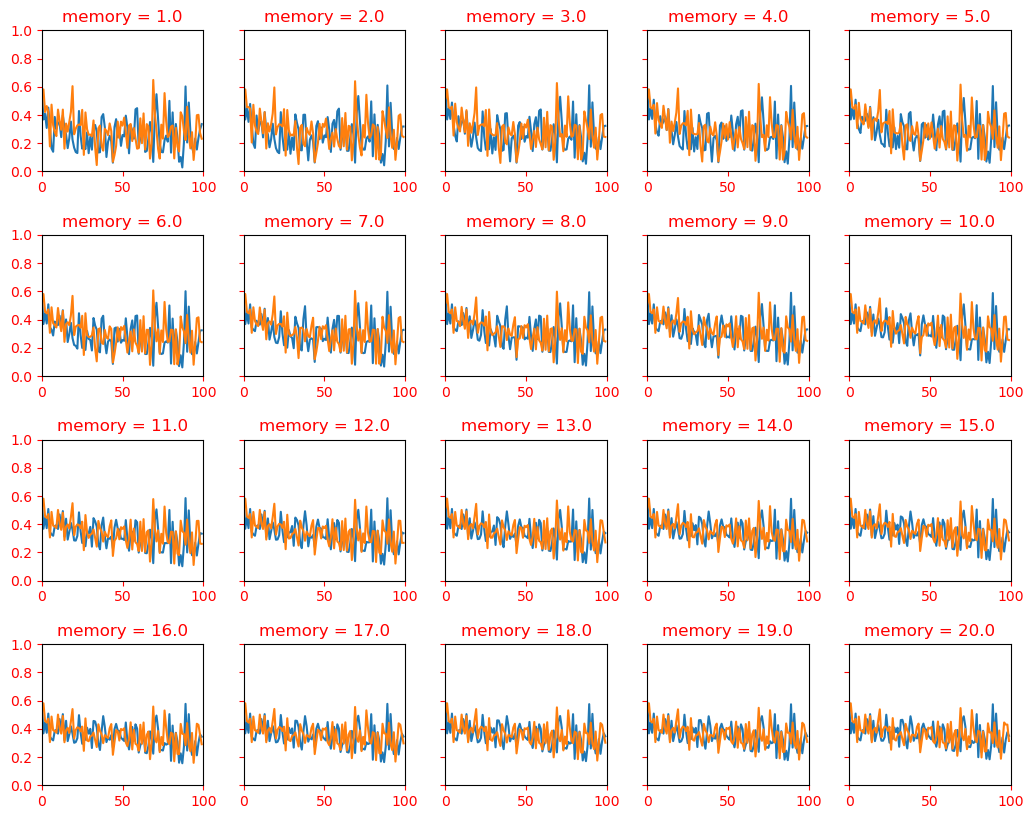

In [8]:
w = 2.5; h = 2.5
ncols = 5
nrows = 4
param_vals = [i for i in range(1, ncols*nrows+1)]
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
t = 100
time = [i for i in range(t)]

for ix, param in enumerate(param_vals):
    # experiments
    world = World(state_size = 10, time = t, agent=["model_sig", "model_sig"], memory=[param, param], behav_control=[1, 1], seed=7)
    world.create_agents()
    world.run()
    agents = world.get_agents()
    errors = world.get_errors()
    preds = world.get_pred()
    priors = world.get_behav_priors()
    costs = world.get_costs()

    ai = tups[ix]
    
    # plots
    ax[ai].plot(time, costs[0])
    ax[ai].plot(time, costs[1])
    ax[ai].set_title('memory = %.1f'%param, color='red')
    ax[ai].set_xlim(0,t)
    ax[ai].set_ylim(0,1)
    ax[ai].tick_params(axis='x', colors='red')
    ax[ai].tick_params(axis='y', colors='red')

print("\n Sigmoid Model Agents: time: 100, behav_control: 5, state size: 10, memory varied")
plt.show()


 Linear Model Agents: time: 100, behav_control: 5, state size: 10, model_var: 0, memory varied


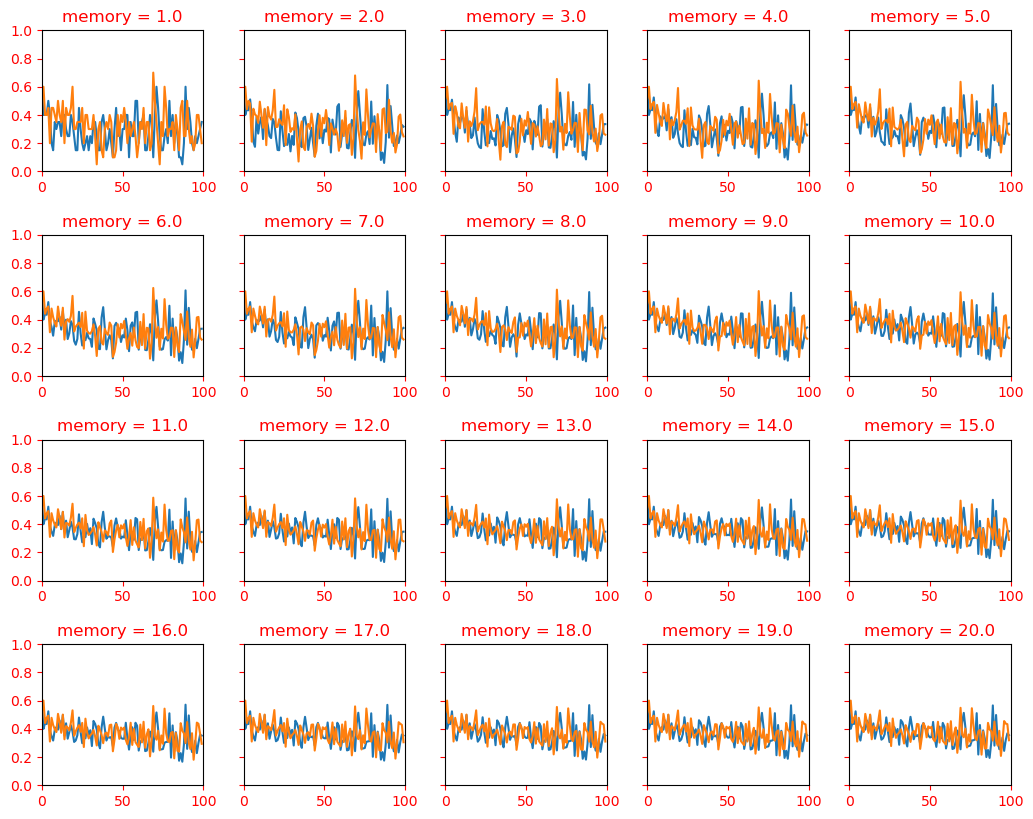

In [9]:
w = 2.5; h = 2.5
ncols = 5
nrows = 4
param_vals = [i for i in range(1, ncols*nrows+1)]
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
t = 100
time = [i for i in range(t)]

for ix, param in enumerate(param_vals):
    # experiments
    world = World(state_size = 10, time = t, agent=["model_lin", "model_lin"], memory=[param, param], behav_control=[1, 1], seed=7)
    world.create_agents()
    world.run()
    agents = world.get_agents()
    errors = world.get_errors()
    preds = world.get_pred()
    priors = world.get_behav_priors()
    costs = world.get_costs()

    ai = tups[ix]
    
    # plots
    ax[ai].plot(time, costs[0])
    ax[ai].plot(time, costs[1])
    ax[ai].set_title('memory = %.1f'%param, color='red')
    ax[ai].set_xlim(0,t)
    ax[ai].set_ylim(0,1)
    ax[ai].tick_params(axis='x', colors='red')
    ax[ai].tick_params(axis='y', colors='red')

print("\n Linear Model Agents: time: 100, behav_control: 5, state size: 10, model_var: 0, memory varied")
plt.show()

## Adjusting Behavioral Control
Behavioral control modulates the stability of priors by determining how many previous priors are considered in an average baseline to be updated to create the next set of priors that influence behavior.


 Sigmoid Model Agents: time: 100, memory: 5, state size: 10, model_var: 0, behav_control varied


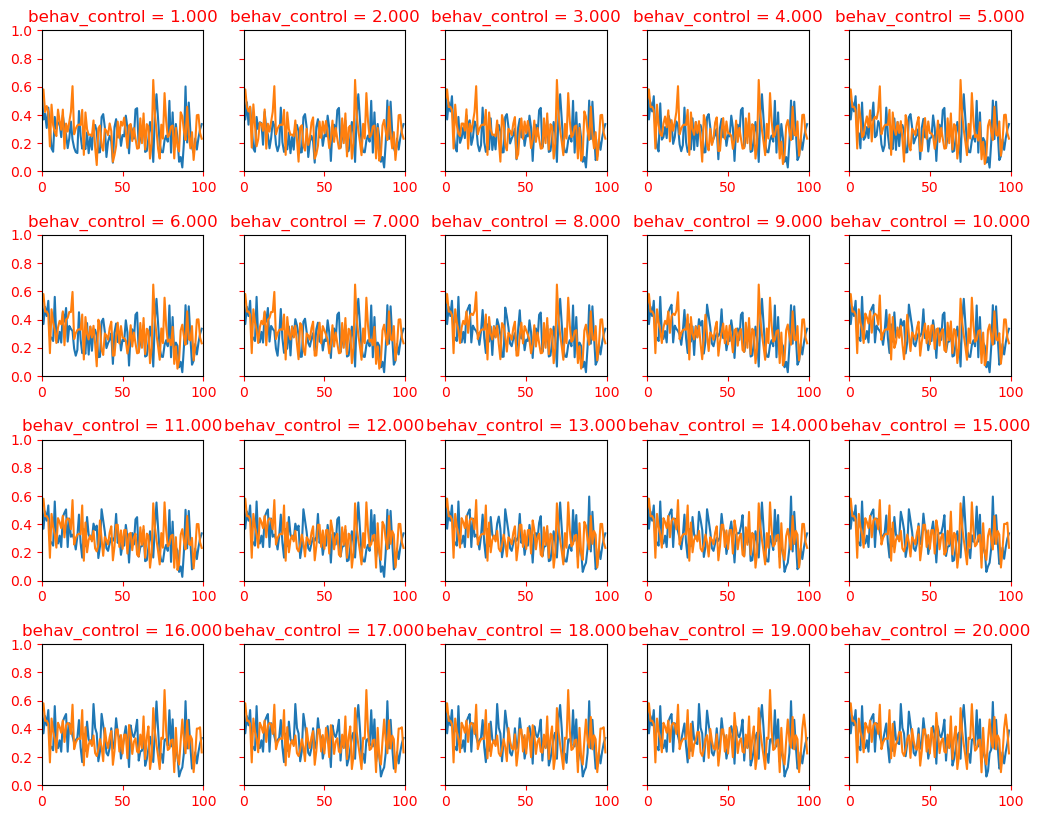

In [10]:
w = 2.5; h = 2.5
ncols = 5
nrows = 4
param_vals = [i for i in range(1, ncols*nrows+1)]
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
t = 100
time = [i for i in range(t)]

for ix, param in enumerate(param_vals):
    # experiments
    world = World(state_size = 10, time = t, agent=["model_sig", "model_sig"], memory=[1, 1], behav_control=[param, param], seed=7)
    world.create_agents()
    world.run()
    agents = world.get_agents()
    errors = world.get_errors()
    preds = world.get_pred()
    priors = world.get_behav_priors()
    costs = world.get_costs()

    ai = tups[ix]
    
    # plots
    ax[ai].plot(time, costs[0])
    ax[ai].plot(time, costs[1])
    ax[ai].set_title('behav_control = %.3f'%param, color='red')
    ax[ai].set_xlim(0,t)
    ax[ai].set_ylim(0,1)
    ax[ai].tick_params(axis='x', colors='red')
    ax[ai].tick_params(axis='y', colors='red')

print("\n Sigmoid Model Agents: time: 100, memory: 5, state size: 10, model_var: 0, behav_control varied")
plt.show()


 Sigmoid Model Agents: time: 100, memory: 5, state size: 10, model_var: 0, behav_control varied


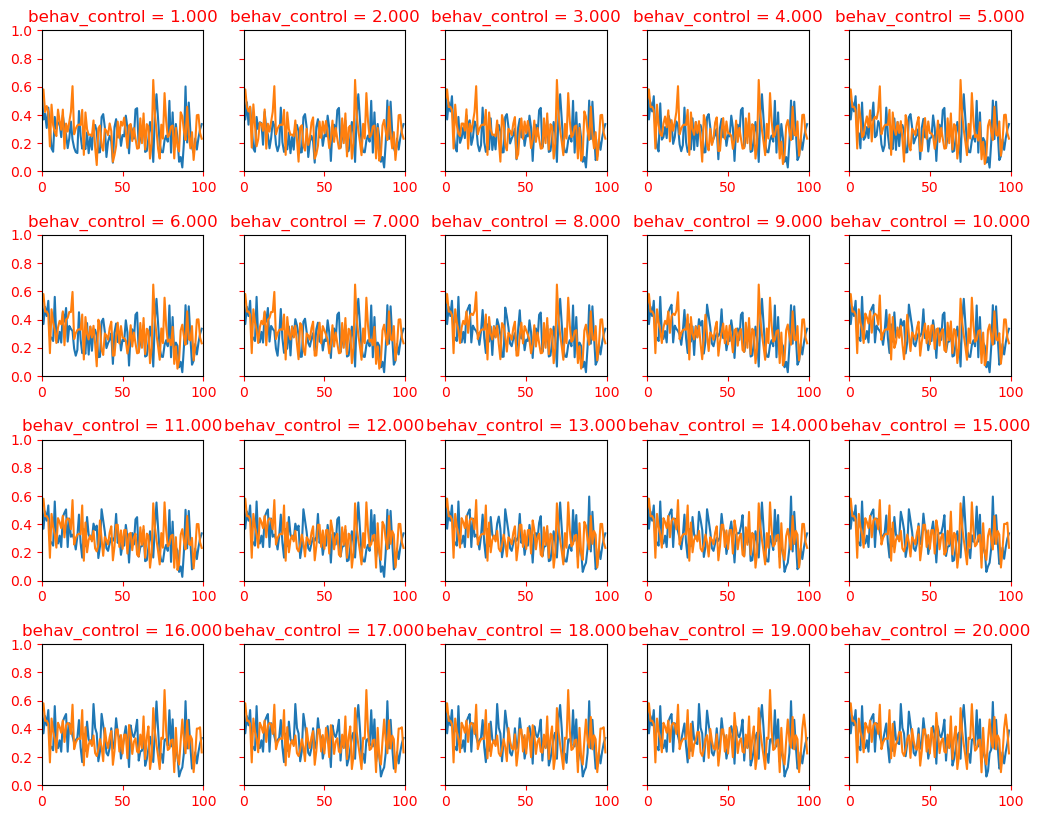

In [11]:
w = 2.5; h = 2.5
ncols = 5
nrows = 4
param_vals = [i for i in range(1, ncols*nrows+1)]
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
t = 100
time = [i for i in range(t)]

for ix, param in enumerate(param_vals):
    # experiments
    world = World(state_size = 10, time = t, agent=["model_sig", "model_sig"], memory=[1, 1], behav_control=[param, param], seed=7)
    world.create_agents()
    world.run()
    agents = world.get_agents()
    errors = world.get_errors()
    preds = world.get_pred()
    priors = world.get_behav_priors()
    costs = world.get_costs()

    ai = tups[ix]
    
    # plots
    ax[ai].plot(time, costs[0])
    ax[ai].plot(time, costs[1])
    ax[ai].set_title('behav_control = %.3f'%param, color='red')
    ax[ai].set_xlim(0,t)
    ax[ai].set_ylim(0,1)
    ax[ai].tick_params(axis='x', colors='red')
    ax[ai].tick_params(axis='y', colors='red')

print("\n Sigmoid Model Agents: time: 100, memory: 5, state size: 10, model_var: 0, behav_control varied")
plt.show()


 Linear Model Agent error as behav_control varies between 1 and 10


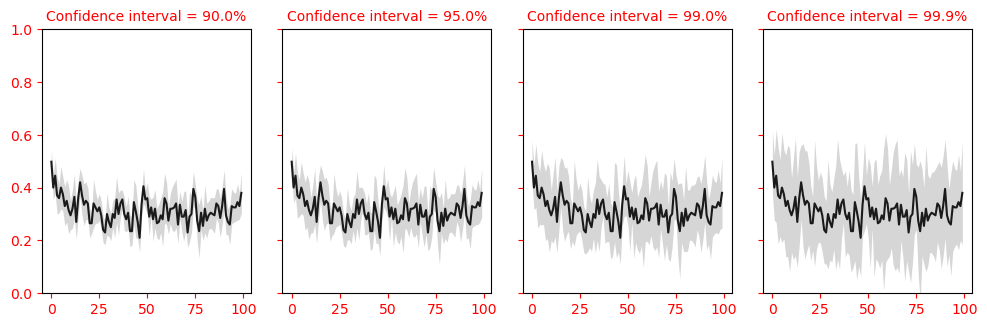

In [12]:
# run experiments
a = []
t = 100
x = [i for i in range(t)]

for i in range(1,11):
    world = World(state_size = 10, time = t, agent=["model_lin", "model_lin"], memory=[1, 1], behav_control=[i, i])
    world.create_agents()
    world.run()
    agents = world.get_agents()
    errors = world.get_errors()
    preds = world.get_pred()
    priors = world.get_behav_priors()
    costs = world.get_costs()

    
    # store each instance of fake data in a list
    a.append(costs[0])

# turn that list into an array for convenience
a = np.array(a)


# test out several confidence intervals, just to get the idea
list_of_confidence_intervals = [0.9, 0.95, 0.99, 0.999]


fig, ax = plt.subplots(1,4,figsize=(12,3.5),dpi=100,sharey=True)
plt.subplots_adjust(wspace=0.15)

for ix, conf_int in enumerate(list_of_confidence_intervals):
    ax[ix].set_ylim(0,1)
    ax[ix].plot(x, np.mean(a,axis=0), color='.1')
    upper, lower = sp.t.interval(conf_int,
                                 len(a)-1,
                                 loc=np.mean(a,axis=0),
                                 scale=sp.sem(a,axis=0))
    ax[ix].fill_between(x, upper, lower, alpha=0.4, lw=0, color='.6')
    ax[ix].set_title('Confidence interval = %.1f%%'%(conf_int*100), fontsize=10, color = 'red')
    ax[ix].tick_params(axis='x', colors='red')
    ax[ix].tick_params(axis='y', colors='red')

print("\n Linear Model Agent error as behav_control varies between 1 and 10")
plt.show()

## Alt Sigmoid
Sigmoid models where the sigmoid calculation uses the previous priors/predictions as a mid-point. That is, when the error is zero, the priors and predictions are barely (if at all - depends on model_val, memory, and behav_control) updated.

Below is an example and then a set of experiments.

In [118]:
world = World(state_size = 20, time = 500, agent=["model_alt", "model_alt"], memory=[7, 7], behav_control=[1, 1], model_var=[1,1])
world.create_agents()
world.run()
agents = world.get_agents()
errors = world.get_errors()
preds = world.get_pred()
priors = world.get_behav_priors()
costs = world.get_costs()
#world.print_results()
time = [t for t in range(len(costs[0]))]

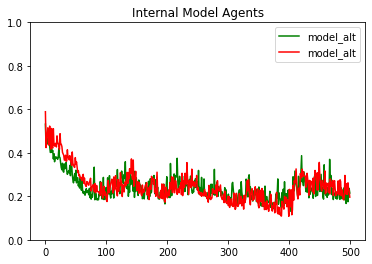

In [119]:
plt.figure(facecolor='white') 
plt.plot(time, costs[0], 'g', label=agents[0])
plt.plot(time, costs[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Internal Model Agents")
plt.show()


 Alternate Sigmoid Model Agents: state_size: 10, time: 100, memory: 5, varied model variance


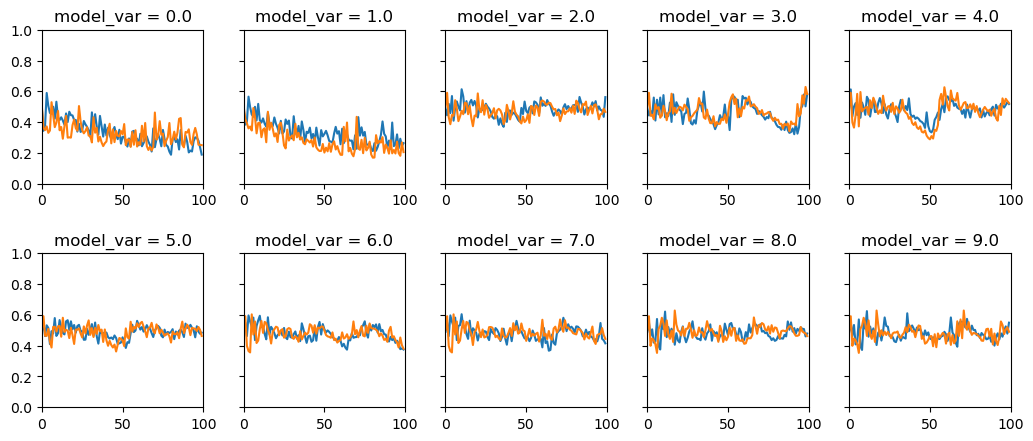

In [153]:
w = 2.5; h = 2.5
ncols = 5
nrows = 2
param_vals = [i for i in range(0, ncols*nrows)]
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
t = 100
time = [i for i in range(t)]

for ix, param in enumerate(param_vals):
    # experiments
    world = World(state_size = 10, time = t, agent=["model_alt", "model_alt"], memory=[5, 5], behav_control=[1, 1], model_var=[param, param], seed=39)
    world.create_agents()
    world.run()
    agents = world.get_agents()
    errors = world.get_errors()
    preds = world.get_pred()
    priors = world.get_behav_priors()
    costs = world.get_costs()

    ai = tups[ix]
    
    # plots
    ax[ai].plot(time, costs[0])
    ax[ai].plot(time, costs[1])
    #ax[ai].set_title('model_var = %.1f'%param, color='red')
    ax[ai].set_title('model_var = %.1f'%param)
    ax[ai].set_xlim(0,t)
    ax[ai].set_ylim(0,1)
    #ax[ai].tick_params(axis='x', colors='red')
    #ax[ai].tick_params(axis='y', colors='red')
    ax[ai].tick_params(axis='x')
    ax[ai].tick_params(axis='y')

print("\n Alternate Sigmoid Model Agents: state_size: 10, time: 100, memory: 5, varied model variance")
plt.show()


 Alternate Sigmoid Model Agents: time: 100, memory: 5, model_var: 0, varied state size


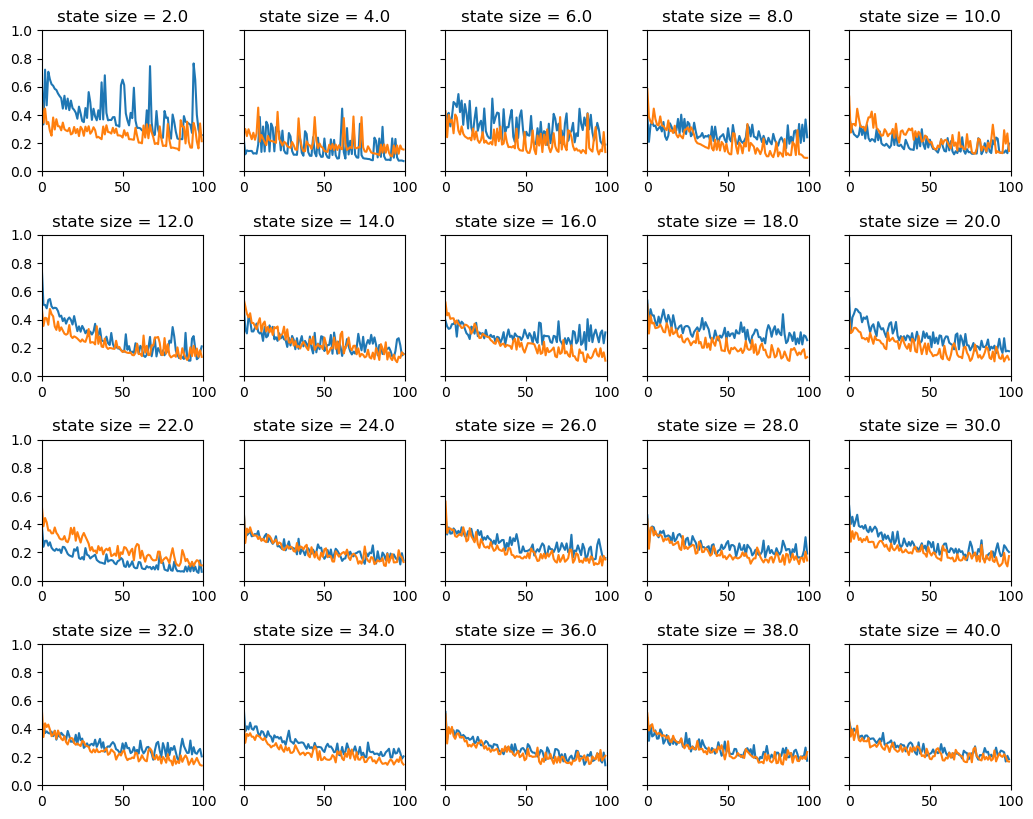

In [152]:
w = 2.5; h = 2.5
ncols = 5
nrows = 4
param_vals = [i*2 for i in range(1, ncols*nrows+1)]
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
t = 100
time = [i for i in range(t)]

for ix, param in enumerate(param_vals):
    # experiments
    world = World(state_size = param, time = t, agent=["model_alt", "model_alt"], memory=[5, 5], behav_control=[1, 1], model_var=[0, 0], seed=4)
    world.create_agents()
    world.run()
    agents = world.get_agents()
    errors = world.get_errors()
    preds = world.get_pred()
    priors = world.get_behav_priors()
    costs = world.get_costs()

    ai = tups[ix]
    
    # plots
    ax[ai].plot(time, costs[0])
    ax[ai].plot(time, costs[1])
    #ax[ai].set_title('state size = %.1f'%param, color='red')
    ax[ai].set_title('state size = %.1f'%param)
    ax[ai].set_xlim(0,t)
    ax[ai].set_ylim(0,1)
    #ax[ai].tick_params(axis='x', colors='red')
    #ax[ai].tick_params(axis='y', colors='red')
    ax[ai].tick_params(axis='x')
    ax[ai].tick_params(axis='y')

print("\n Alternate Sigmoid Model Agents: time: 100, memory: 5, model_var: 0, varied state size")
plt.show()


 Alternate Sigmoid Model Agents: state_size: 5, time: 100, memory: 5, model_var: 0, varied behavioral control


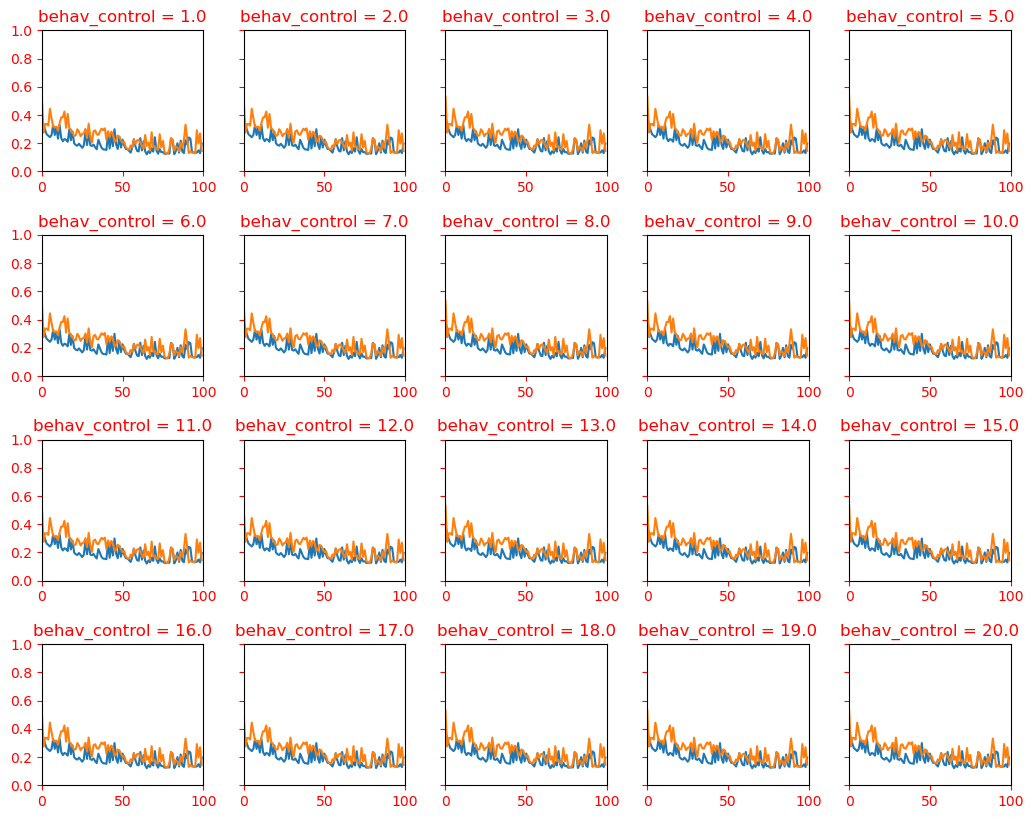

In [131]:
w = 2.5; h = 2.5
ncols = 5
nrows = 4
param_vals = [i for i in range(1, ncols*nrows+1)]
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
t = 100
time = [i for i in range(t)]

for ix, param in enumerate(param_vals):
    # experiments
    world = World(state_size = 10, time = t, agent=["model_alt", "model_alt"], memory=[5, 5], behav_control=[param, param], model_var=[0, 0], seed=4)
    world.create_agents()
    world.run()
    agents = world.get_agents()
    errors = world.get_errors()
    preds = world.get_pred()
    priors = world.get_behav_priors()
    costs = world.get_costs()

    ai = tups[ix]
    
    # plots
    ax[ai].plot(time, costs[0])
    ax[ai].plot(time, costs[1])
    ax[ai].set_title('behav_control = %.1f'%param, color='red')
    ax[ai].set_xlim(0,t)
    ax[ai].set_ylim(0,1)
    ax[ai].tick_params(axis='x', colors='red')
    ax[ai].tick_params(axis='y', colors='red')
    

print("\n Alternate Sigmoid Model Agents: state_size: 10, time: 100, memory: 5, model_var: 0, varied behavioral control")
plt.show()


 Alternate Sigmoid Model Agents: state_size: 10, time: 100, model_var: 0, varied memory


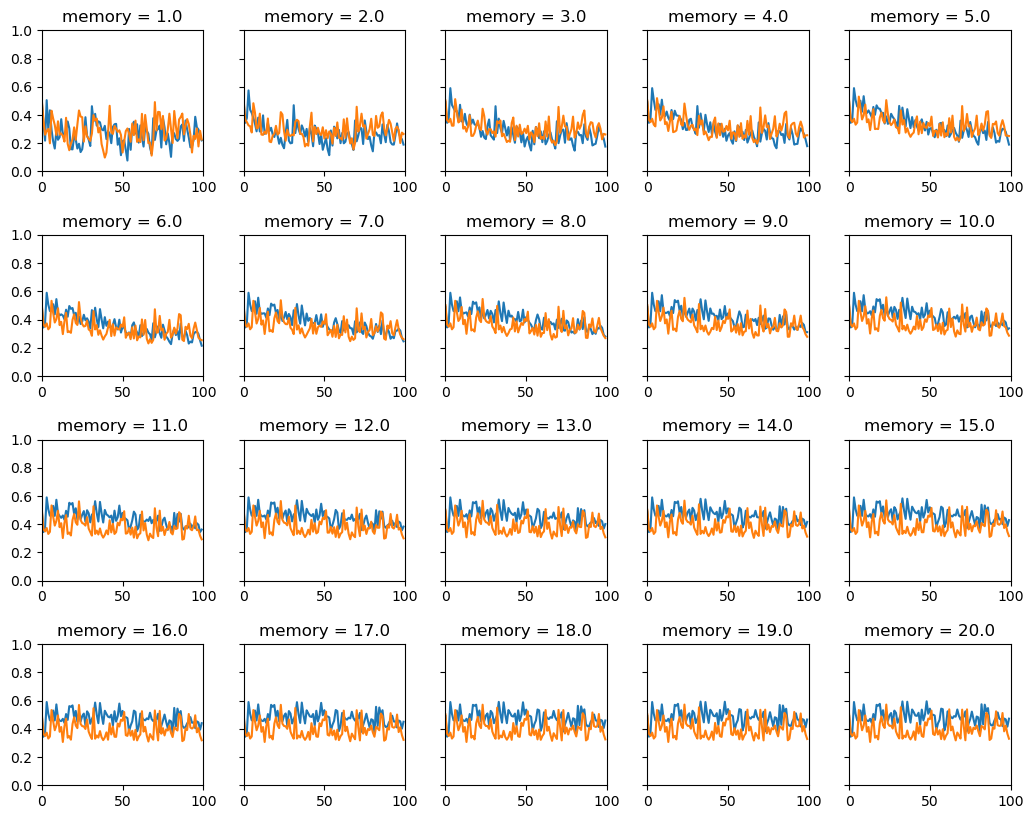

In [156]:

w = 2.5; h = 2.5
ncols = 5
nrows = 4
param_vals = [i for i in range(1, ncols*nrows+1)]
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
t = 100
time = [i for i in range(t)]

for ix, param in enumerate(param_vals):
    # experiments
    world = World(state_size = 10, time = t, agent=["model_alt", "model_alt"], memory=[param, param], behav_control=[1, 1], model_var=[0, 0], seed=39)
    world.create_agents()
    world.run()
    agents = world.get_agents()
    errors = world.get_errors()
    preds = world.get_pred()
    priors = world.get_behav_priors()
    costs = world.get_costs()

    ai = tups[ix]
    
    # plots
    ax[ai].plot(time, costs[0])
    ax[ai].plot(time, costs[1])
    #ax[ai].set_title('memory = %.1f'%param, color='red')
    ax[ai].set_title('memory = %.1f'%param)
    ax[ai].set_xlim(0,t)
    ax[ai].set_ylim(0,1)
    #ax[ai].tick_params(axis='x', colors='red')
    #ax[ai].tick_params(axis='y', colors='red')
    ax[ai].tick_params(axis='x')
    ax[ai].tick_params(axis='y')

print("\n Alternate Sigmoid Model Agents: state_size: 10, time: 100, model_var: 0, varied memory")
plt.show()